# t-SNE 範例
* 觀察S曲線使用 t-SNE 不同 perplexity 的流形還原效果

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [6]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

# 設定S曲線資料點
X, y = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果

circles, perplexity=4 in 0.83 sec
circles, perplexity=6 in 0.82 sec
circles, perplexity=9 in 0.86 sec
circles, perplexity=14 in 0.86 sec
circles, perplexity=21 in 1 sec
circles, perplexity=30 in 1 sec
circles, perplexity=45 in 1.1 sec
circles, perplexity=66 in 1 sec
circles, perplexity=100 in 1.6 sec


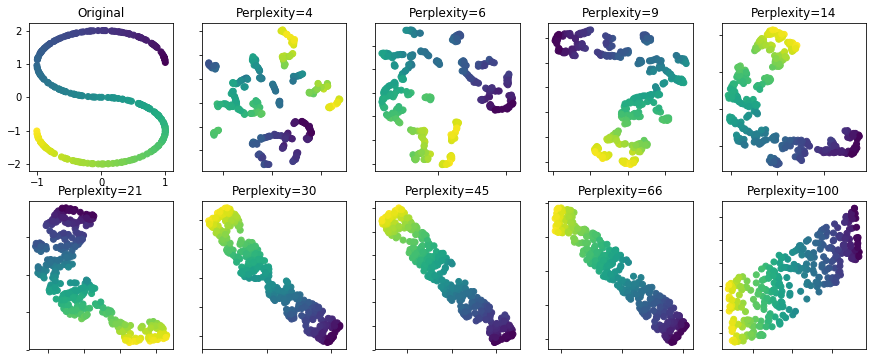

In [8]:
# 繪製不同 perplexity 下的 t-SNE 分群圖 (請注意! 語法也要對應調整)
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))

ax = subplots.ravel()[0]
ax.scatter(X[:, 0], X[:, 2], c=y)
ax.set_title(f"Original")

# 繪製不同 perplexity 下的 t-SNE 分群圖
for i, perplexity in enumerate(perplexities):
    if i<4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Xp = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Xp[:, 0], Xp[:, 1], c=y)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    
plt.show()

In [9]:
X

array([[ 4.43998676e-01,  1.81311100e+00, -1.03972559e-01],
       [ 8.97240971e-01,  1.54809467e+00, -1.44154121e+00],
       [ 8.24049301e-01,  6.66290304e-01, -4.33481907e-01],
       [ 4.10510678e-01,  1.62202780e-01, -8.81442091e-02],
       [-6.59036188e-01,  8.14482343e-01,  2.47888769e-01],
       [ 9.80896874e-01,  4.64468284e-01, -8.05471539e-01],
       [-5.54886622e-01,  2.64975270e-01,  1.68074019e-01],
       [-5.23352797e-01,  1.06854364e-01, -1.85211610e+00],
       [-9.41927938e-01,  1.45118873e+00, -1.33581507e+00],
       [-8.90543161e-01,  2.28549173e-02,  5.45101245e-01],
       [ 3.82175114e-01,  1.54116150e+00, -1.92408992e+00],
       [ 2.68974566e-01,  2.93893291e-01, -3.68527200e-02],
       [ 5.98241571e-01,  1.59044165e-01, -1.98684193e-01],
       [-7.64045890e-01,  1.79206068e-01, -1.64516190e+00],
       [ 7.84132634e-01,  1.34409561e+00,  1.62059327e+00],
       [ 6.81362150e-01,  4.90734420e-01,  1.73194646e+00],
       [ 9.81899474e-01,  8.41078933e-01

In [31]:
a = abs(X[:,0])+abs(X[:,2])

Text(0.5, 1.0, '1&2')

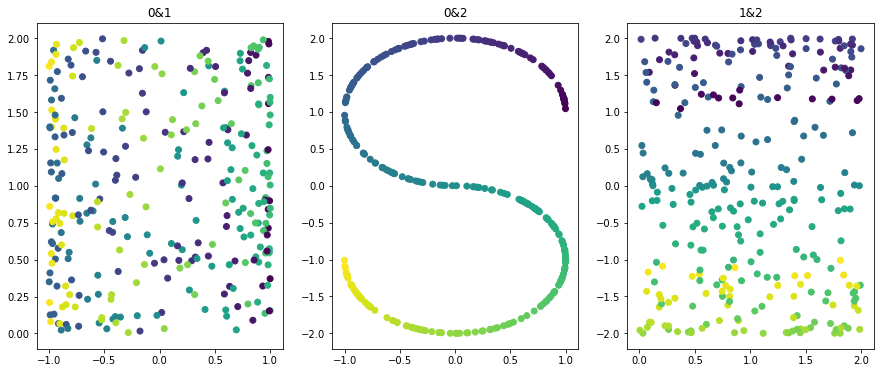

In [43]:
fig,ax = plt.subplots(1,3,figsize=(15, 6))
ax[0].scatter(X[:, 0], X[:, 1], c=y)
ax[0].set_title(f"0&1")
ax[1].scatter(X[:, 0], X[:, 2], c=y)
ax[1].set_title(f"0&2")
ax[2].scatter(X[:, 1], X[:, 2], c=y)
ax[2].set_title(f"1&2")

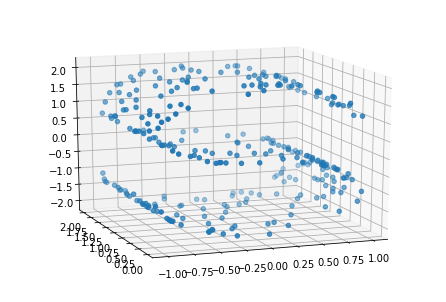

In [93]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2])
ax.view_init(azim=250,elev=15)